In [3]:
!pip -q install huggingface_hub 
!huggingface-cli download badger-lord/embeddings2025 --repo-type dataset --local-dir ./embeddings2025 --quiet

/root/verb-workspace/embeddings2025


In [4]:
!pip -q install umap-learn

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [14]:
%%time
#read in the datasets
embeddings_df = pd.read_parquet('embeddings2025/embeddings.parquet')
captions_df   = pd.read_parquet('embeddings2025/captions.parquet')

#took 6.9s dataset is 2.68G

CPU times: user 7.63 s, sys: 5.07 s, total: 12.7 s
Wall time: 6.89 s


In [4]:
# grab the embedding data 
X_embeddings=embeddings_df.values

# check size of embeddings
print(X_embeddings.shape)
# what's the data type?
print(X_embeddings.dtype)

(652671, 768)
float32


In [5]:
%%time

## KMeans on all the data
# 1. Instantiate the model
kmeans = KMeans(n_clusters=10, random_state=0, n_init='auto')

# 2. Fit and predict cluster labels
kmeans_labels = kmeans.fit_predict(X_embeddings)  

# 3. Inspect results
kmeans_centroids = kmeans.cluster_centers_
print("Labels:", kmeans_labels)

# 10  clusters took 48.7s on Brev: data is (652671 x 768d)
# 300 clusters took 21minutes 9s on Brev. same data

Labels: [7 2 6 ... 4 4 5]
CPU times: user 2min 7s, sys: 11.3 s, total: 2min 18s
Wall time: 48.7 s


In [12]:
%%time
## PCA
# 1a. If X is a pandas DataFrame, convert to NumPy
X_np = X_embeddings.values if hasattr(X_embeddings, "values") else X_embeddings

# 1b. PCA to 50 components
pca = PCA(n_components=10, random_state=42)
X_reduced = pca.fit_transform(X_np)

# took 3.26s to do 768d->50d
# took 3.11s to do 768d->10d
# took 3.15s to do 768d->3d

CPU times: user 11.6 s, sys: 71.2 ms, total: 11.7 s
Wall time: 3.26 s


In [13]:
%%time
## KMeans reduced data
# 1. Instantiate the model
kmeans = KMeans(n_clusters=300, random_state=0, n_init='auto')

# 2. Fit and predict cluster labels
kmeans_labels_reduced = kmeans.fit_predict(X_reduced)  

# 3. Inspect results
kmeans_centroids = kmeans.cluster_centers_
print("Labels:", kmeans_labels_reduced)
# 300 clusters took 1min 51s with data (652671 x 50d)
# 300 clusters took 1min 25s with data (652671 x 10d)
# 300 clusters took  53s with data (652671 x 3d)

Labels: [249   4 178 ... 184 121 263]
CPU times: user 3min 45s, sys: 184 ms, total: 3min 45s
Wall time: 1min 53s


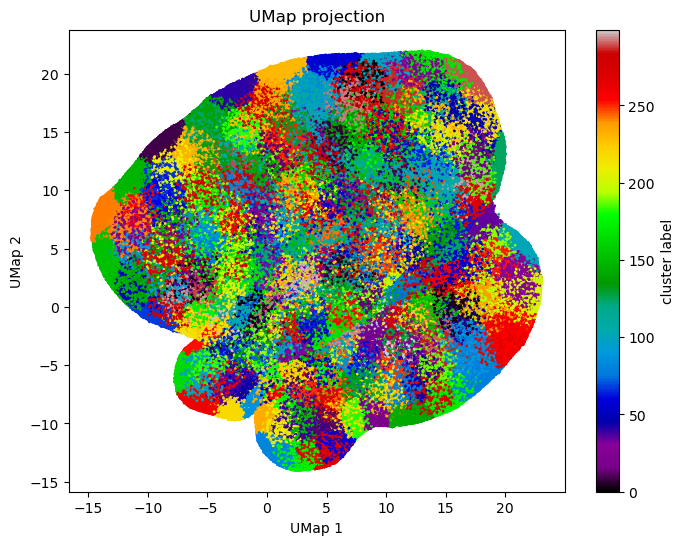

In [21]:
# Plot embeddings 2D
num_labels = 300
cmap = plt.get_cmap('nipy_spectral', num_labels)

plt.figure(figsize=(8,6))
plt.scatter(X_reduced_umap[:,0], X_reduced_umap[:,1], c=kmeans_labels_reduced, cmap=cmap, s=1)
plt.title("UMap projection")
plt.xlabel("UMap 1")
plt.ylabel("UMap 2")
plt.colorbar(label='cluster label')
plt.show()

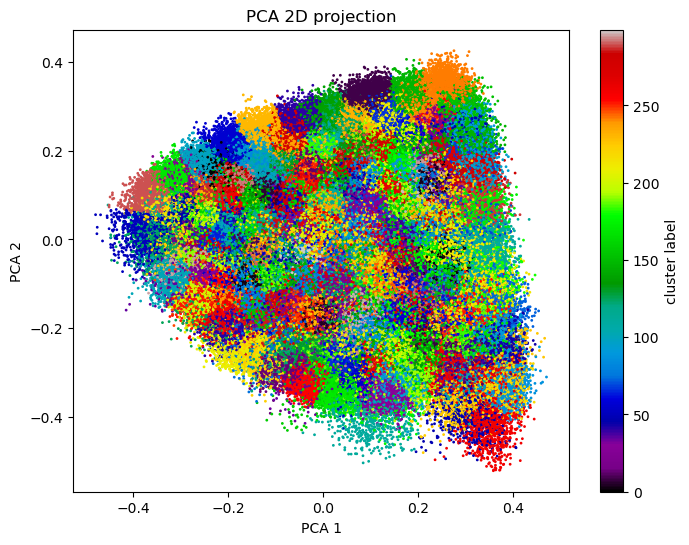

In [22]:
# Plot data 2D from PCA

num_labels = 300
cmap = plt.get_cmap('nipy_spectral', num_labels)

plt.figure(figsize=(8,6))
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=kmeans_labels_reduced, cmap=cmap, s=1)
plt.title("PCA 2D projection")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='cluster label')
plt.show()

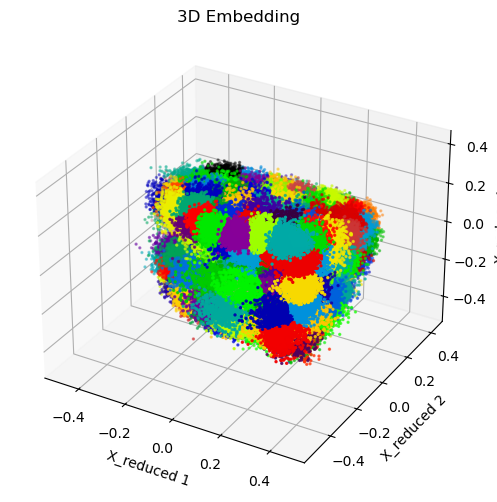

In [23]:
## Plot embeddings 3D PCA

num_labels = 300
cmap = plt.get_cmap('nipy_spectral', num_labels)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# If you have labels:
sc = ax.scatter(X_reduced[:,0], X_reduced[:,1], X_reduced[:,2], c=kmeans_labels_reduced, cmap=cmap, s=2)

ax.set_xlabel('X_reduced 1')
ax.set_ylabel('X_reduced 2')
ax.set_zlabel('X_reduced 3')
plt.title('3D Embedding ')

# Rotate view: elev=30 degrees, azim=45 degrees
ax.view_init(elev=20, azim=55)

plt.show()